In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
import pyvis

C:\Users\AKaiz\Documents\Year 3\Dissertation\code\Networks\venv\Lib\site-packages\nxviz\__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [3]:
""" Loading Data and converting to edge list """
atop = pd.read_csv('atop_directed_2018.csv')

# Military aid obligation (Defence / Offence) edge list
military_edge_list = atop[['state_nameA', 'state_nameB']].rename(columns={'state_nameA':'source', 'state_nameB':'target'})
# combines defence and offence with or
military_s = atop['defense'].astype(bool).combine(atop['offense'].astype(bool), lambda x, y: x or y)
# Drops entries that do not have any defence / offence obligations
military_edge_list['weight'] = military_s
military_edge_list = military_edge_list[military_edge_list['weight'] == True]
military_edge_list.drop('weight', axis=1, inplace=True)

# Neutrality edge list
neutrality_edge_list = atop[['state_nameA', 'state_nameB', 'neutral']].rename(columns={'state_nameA':'source', 'state_nameB':'target', 'neutral':'weight'})
# Drops entries that do not have any neutrality obligations
neutrality_edge_list = neutrality_edge_list[neutrality_edge_list['weight'] == 1]
neutrality_edge_list.drop('weight', axis=1, inplace=True)

# Non Aggression edge list
non_aggression_edge_list = atop[['state_nameA', 'state_nameB', 'nonagg']].rename(columns={'state_nameA':'source', 'state_nameB':'target', 'nonagg':'weight'})
# Drops entries that do not have any non aggression obligations
non_aggression_edge_list = non_aggression_edge_list[non_aggression_edge_list['weight'] == 1]
non_aggression_edge_list.drop('weight', axis=1, inplace=True)

# Consult edge list
consult_edge_list = atop[['state_nameA', 'state_nameB', 'consul']].rename(columns={'state_nameA':'source', 'state_nameB':'target', 'consul':'weight'})
# Drops entries that do not have any consul obligations
consult_edge_list = consult_edge_list[consult_edge_list['weight'] == 1]
consult_edge_list.drop('weight', axis=1, inplace=True)

# All alliances edge list
alliance_obligations = atop[['state_nameA', 'state_nameB']].rename(columns={'state_nameA':'source', 'state_nameB':'target'})
alliance_obligations['weight'] = atop['defense'].combine(atop['offense'], lambda x, y: x or y).combine(atop['neutral'].combine(atop['consul'].combine(atop['nonagg'], lambda x, y:  2 if y > 0 else x), lambda x, y: 3 if x > 0 else y), lambda x, y: 4 if x > 0 else y)

In [4]:
""" Export data for gephi visualisation """
alliance_obligations.to_csv('./graphs/alliance_edge_2018.csv', index=False)

In [5]:
""" Create Networkx Graphs and Export for Visualisation """
# Weighted relations
weight_path = './graphs/weighted.csv'
alliance_obligations.to_csv(weight_path, index=False)
G = nx.from_pandas_edgelist(alliance_obligations, create_using=nx.DiGraph)

# Military aid (Defence / Offence)
GM = nx.from_pandas_edgelist(military_edge_list, create_using=nx.DiGraph)

# Neutrality
GN = nx.from_pandas_edgelist(neutrality_edge_list, create_using=nx.DiGraph)

# Non Aggression
GA = nx.from_pandas_edgelist(non_aggression_edge_list, create_using=nx.DiGraph)

# Consult
GC = nx.from_pandas_edgelist(consult_edge_list, create_using=nx.DiGraph)

C:\Users\AKaiz\Documents\Year 3\Dissertation\code\Networks\venv\Lib\site-packages\networkx\drawing\nx_pylab.py:605: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  source_node_size = self.node_size[self.nodelist.index(source)]
C:\Users\AKaiz\Documents\Year 3\Dissertation\code\Networks\venv\Lib\site-packages\networkx\drawing\nx_pylab.py:606: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_node_size = self.node_size[self.nodelist.index(target)]


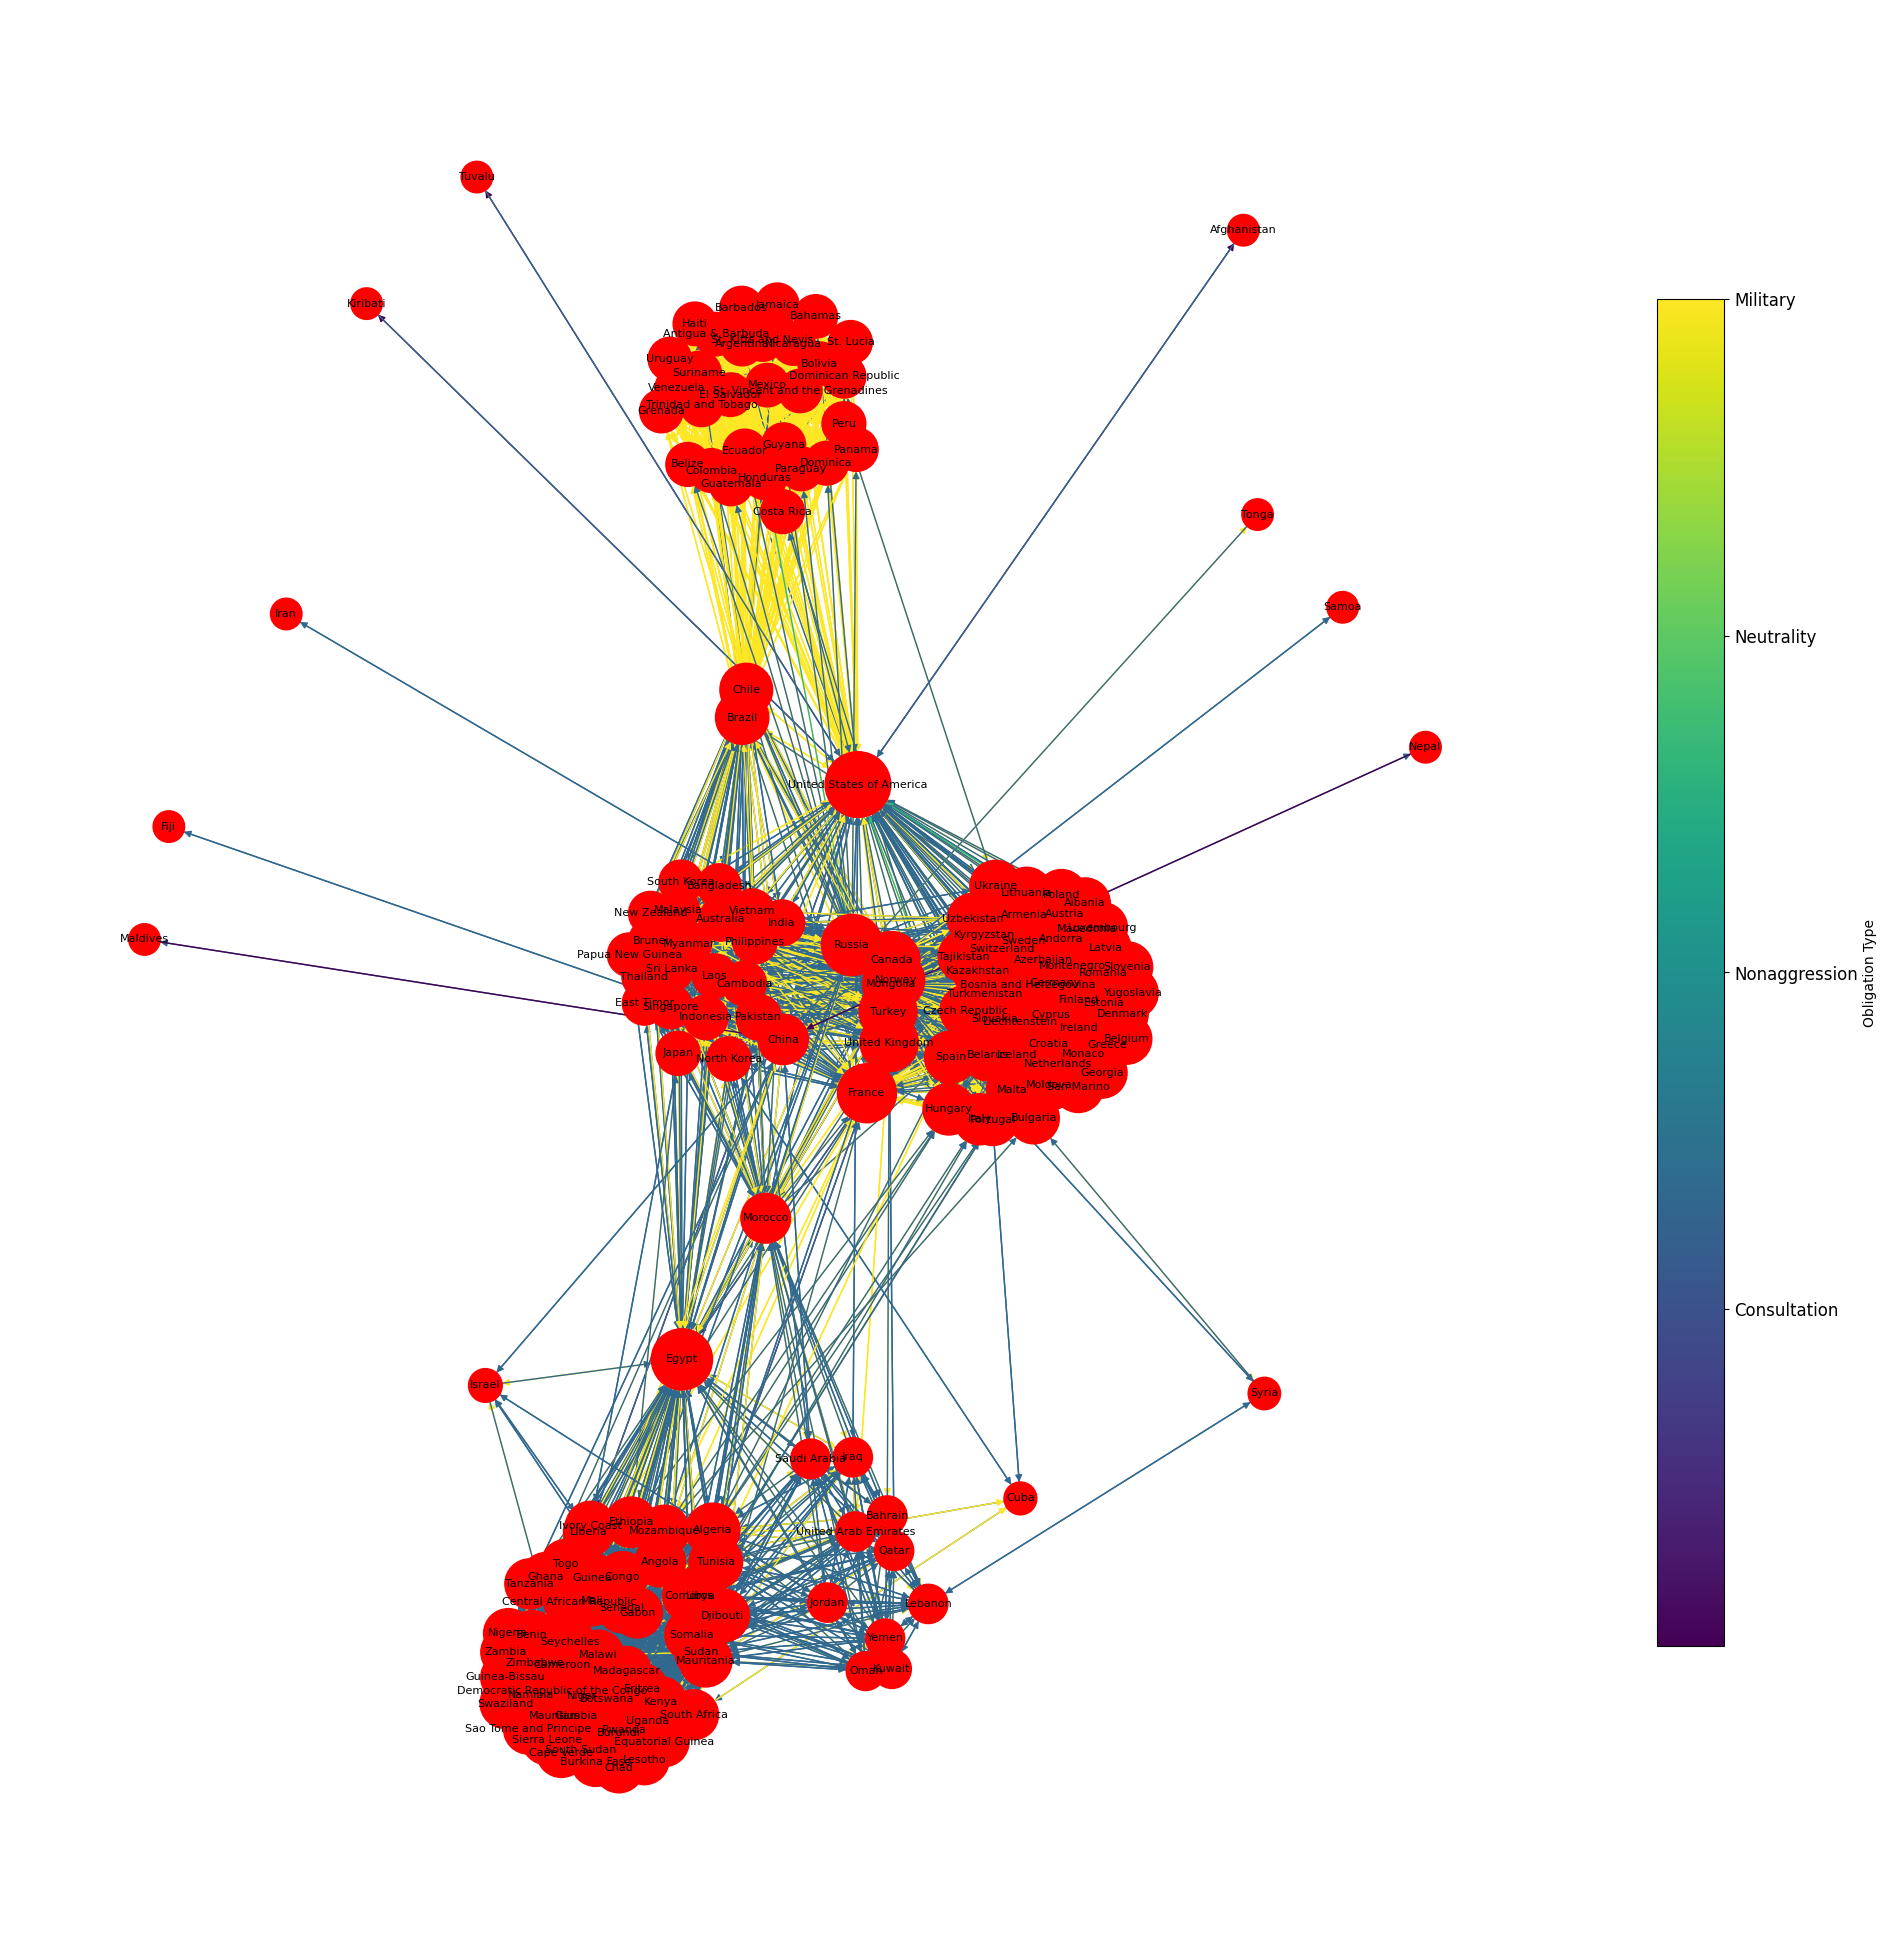

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\AKaiz\\Documents\\Year 3\\Dissertation\\code\\Networks\\atop\\outputs\\allianceNetwork.png'

<Figure size 640x480 with 0 Axes>

In [6]:
""" Visualizing Networkx graph with Matplotlib """
fig, ax = plt.subplots(figsize=(25,25))

# Number of alliances per state divided by two to account for directed (asym counts as half)
node_sizes = alliance_obligations.groupby('source')['target'].nunique()*10 + alliance_obligations.groupby('target')['source'].nunique()*10 / 2 +500

edge_cmap = plt.cm.viridis

nx.draw(G,nodelist=list(node_sizes.keys()), node_size=node_sizes, with_labels=True, font_size=8, node_color='red', edge_color=alliance_obligations['weight'], edge_cmap=edge_cmap, pos=nx.spring_layout(G))

# Creating and plotting a colour bar
sm = plt.cm.ScalarMappable(cmap=edge_cmap)
sm.set_array([])  # Set an empty array to map the colors
cbar = fig.colorbar(sm, label='Obligation Type',ax=ax, ticks=[1,0.75,0.5,0.25], shrink=0.7)
cbar.ax.set_yticklabels(['Military','Neutrality','Nonaggression','Consultation'])
cbar.ax.tick_params(labelsize=12)

plt.show()
plt.savefig('./outputs/allianceNetwork.png')

C:\Users\AKaiz\anaconda3\envs\Networks\lib\site-packages\networkx\drawing\nx_pylab.py:831: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  source_node_size = node_size[nodelist.index(source)]
C:\Users\AKaiz\anaconda3\envs\Networks\lib\site-packages\networkx\drawing\nx_pylab.py:832: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_node_size = node_size[nodelist.index(target)]


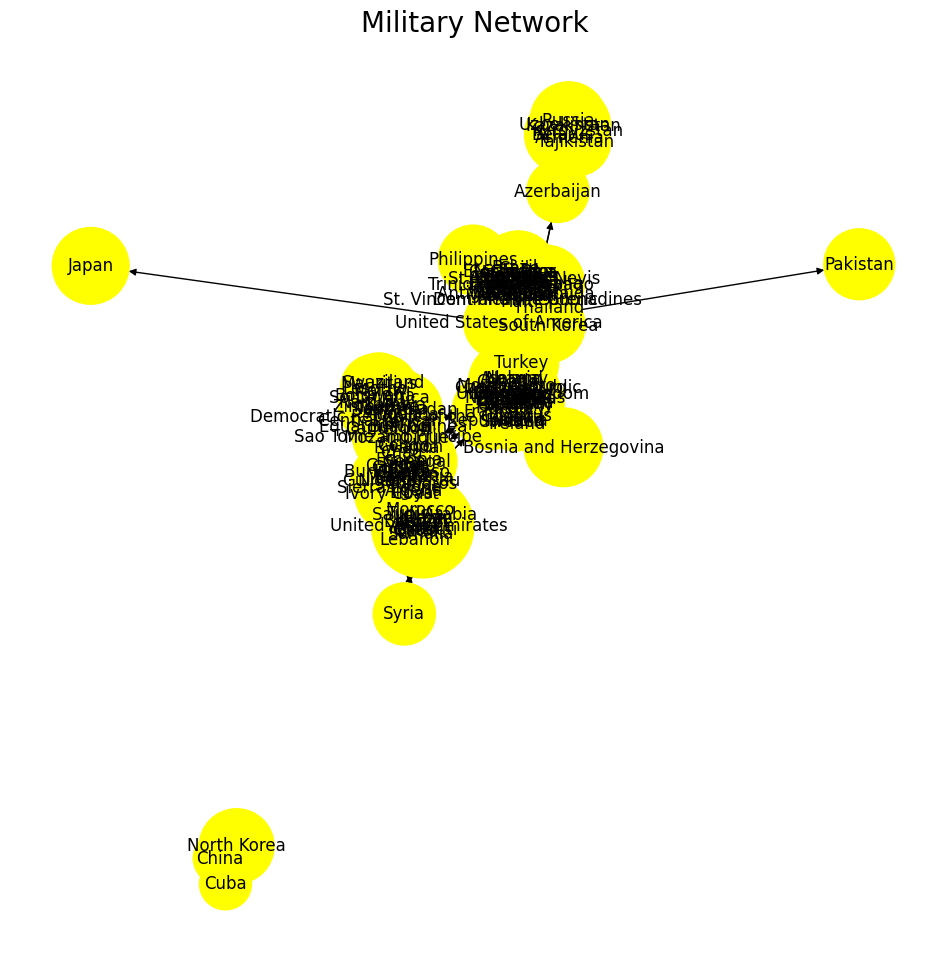

In [56]:
""" Visualising military alliances with Matplotlib """
plt.figure(figsize=(12,12))
plt.title('Military Network', fontsize=20)
# Number of alliances per state divided by two to account for directed
node_sizes = (military_edge_list.groupby('source')['target'].nunique()*100 + military_edge_list.groupby('target')['source'].nunique()*50) /2 + 500
nx.draw(GM, with_labels=True, node_size=node_sizes, node_color='yellow', pos=nx.spring_layout(GM))

plt.savefig('./outputs/militaryNetwork.png')

C:\Users\AKaiz\anaconda3\envs\Networks\lib\site-packages\networkx\drawing\nx_pylab.py:831: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  source_node_size = node_size[nodelist.index(source)]
C:\Users\AKaiz\anaconda3\envs\Networks\lib\site-packages\networkx\drawing\nx_pylab.py:832: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_node_size = node_size[nodelist.index(target)]


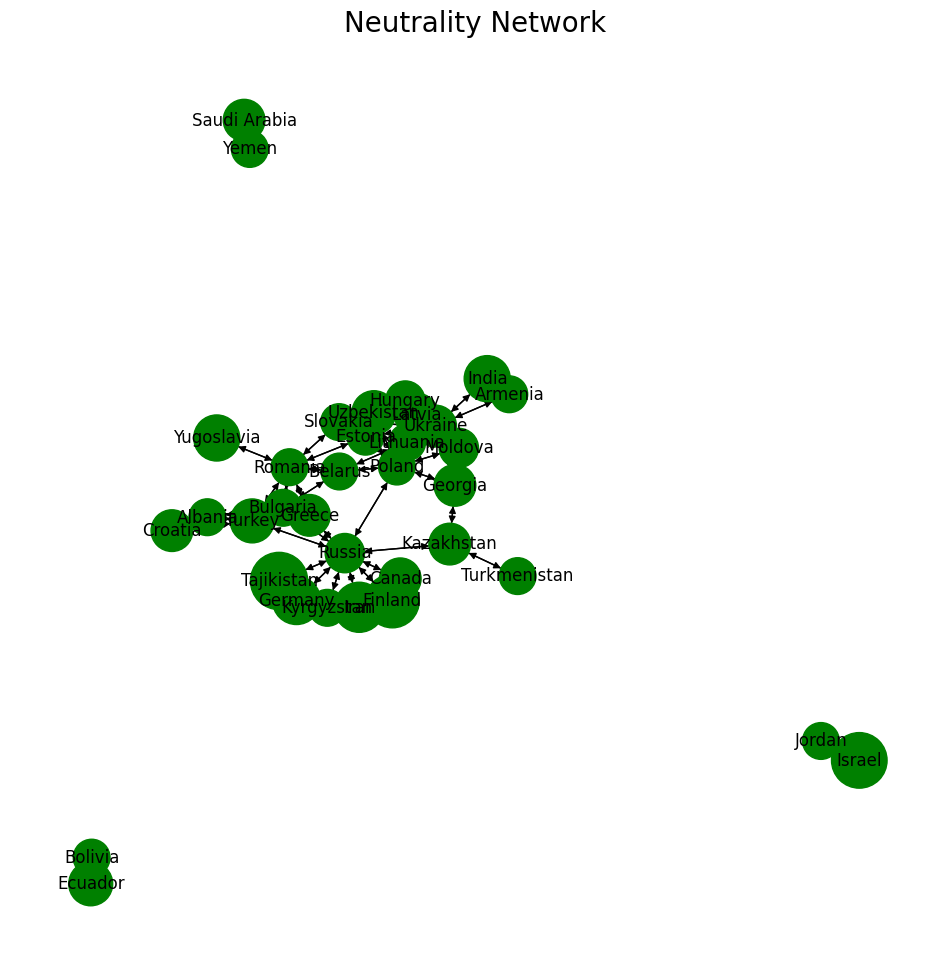

In [57]:
""" Visualising neutrality alliances with Matplotlib """
plt.figure(figsize=(12,12))
plt.title('Neutrality Network', fontsize=20)
# Number of alliances per state divided by two to account for directed
node_sizes = (neutrality_edge_list.groupby('source')['target'].nunique()*100 + neutrality_edge_list.groupby('target')['source'].nunique()*100) /2 + 600
nx.draw(GN, with_labels=True, node_size=node_sizes, node_color='green', pos=nx.spring_layout(GN))

plt.savefig('./outputs/neutralityNetwork.png')

C:\Users\AKaiz\anaconda3\envs\Networks\lib\site-packages\networkx\drawing\nx_pylab.py:831: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  source_node_size = node_size[nodelist.index(source)]
C:\Users\AKaiz\anaconda3\envs\Networks\lib\site-packages\networkx\drawing\nx_pylab.py:832: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_node_size = node_size[nodelist.index(target)]


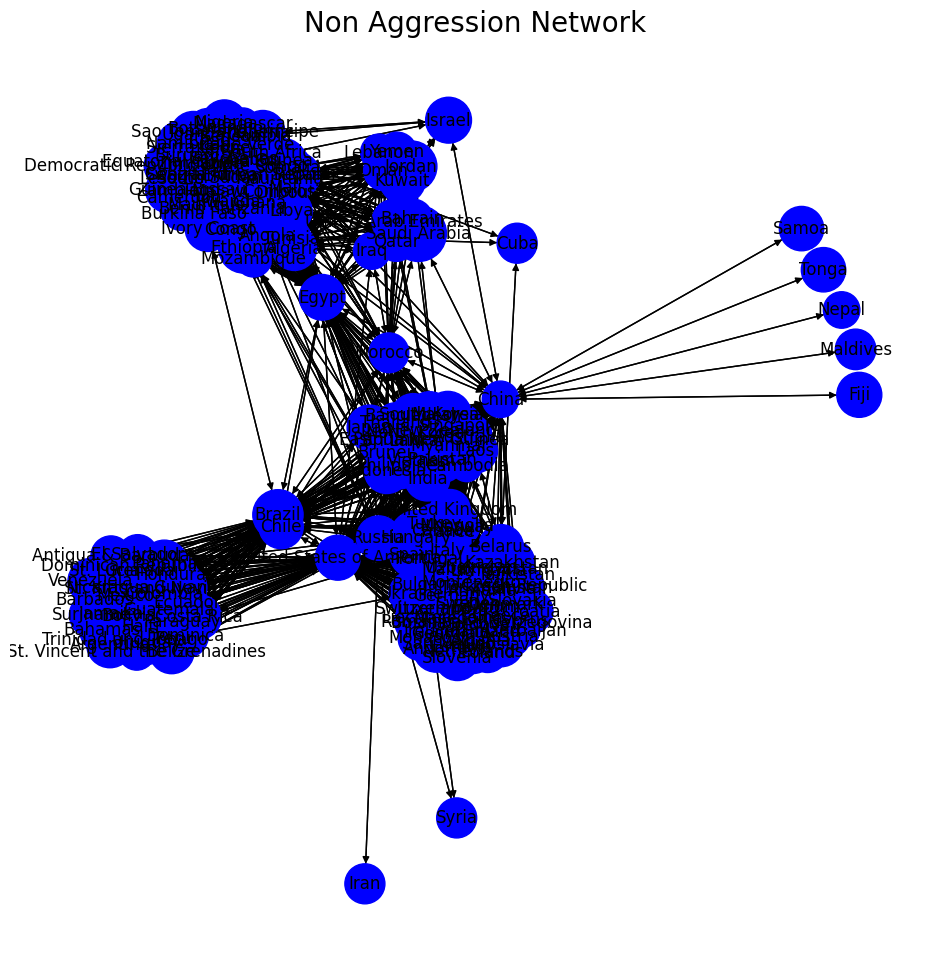

In [58]:
""" Visualising non-aggression agreements with Matplotlib """
plt.figure(figsize=(12,12))
plt.title('Non Aggression Network', fontsize=20)

# Number of alliances per state divided by two to account for directed
node_sizes = (non_aggression_edge_list.groupby('source')['target'].nunique()*10 + non_aggression_edge_list.groupby('target')['source'].nunique()*10) /2 + 500
nx.draw(GA, with_labels=True, node_size=node_sizes, node_color='blue', pos=nx.spring_layout(GA))


plt.savefig('./outputs/nonaggNetwork.png')

C:\Users\AKaiz\anaconda3\envs\Networks\lib\site-packages\networkx\drawing\nx_pylab.py:831: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  source_node_size = node_size[nodelist.index(source)]
C:\Users\AKaiz\anaconda3\envs\Networks\lib\site-packages\networkx\drawing\nx_pylab.py:832: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_node_size = node_size[nodelist.index(target)]


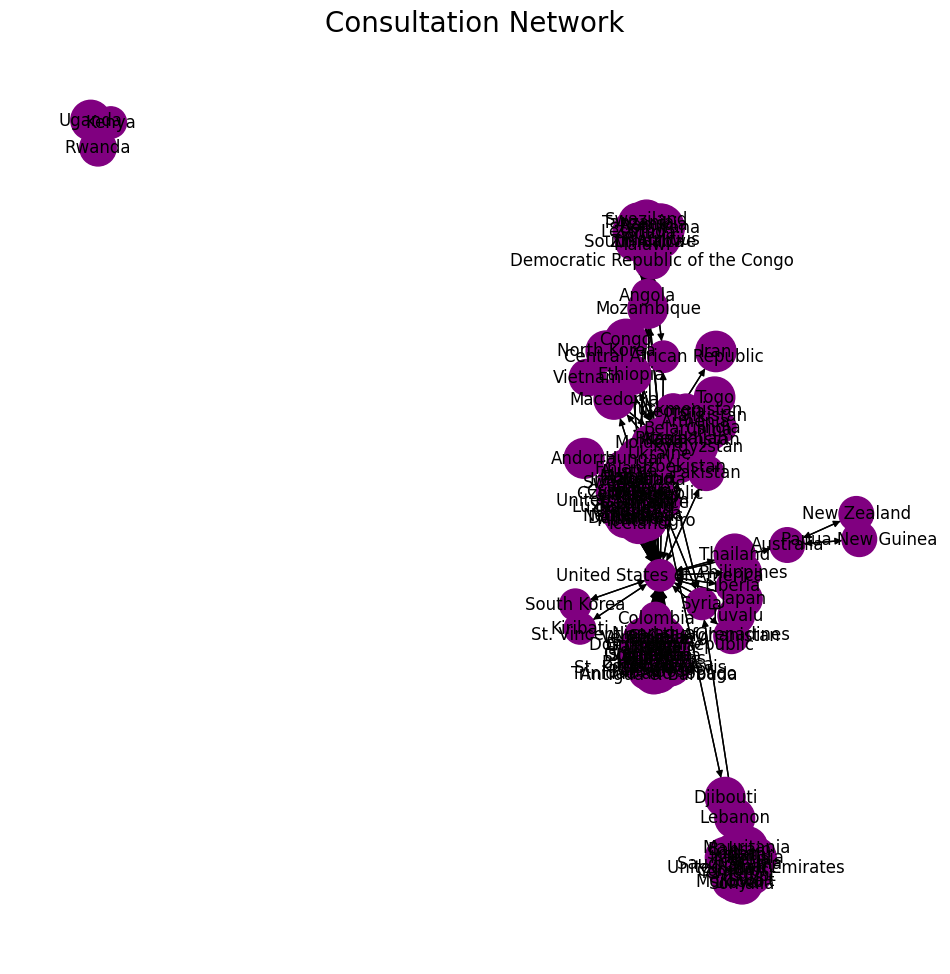

In [59]:
""" Visualising consultation agreements with Matplotlib """
plt.figure(figsize=(12,12))
plt.title('Consultation Network', fontsize=20)
# Number of alliances per state divided by two to account for directed
node_sizes = (consult_edge_list.groupby('source')['target'].nunique()*10 + consult_edge_list.groupby('target')['source'].nunique()*10) /2 + 500
nx.draw(GC, with_labels=True, node_size=node_sizes, node_color='purple', pos=nx.spring_layout(GC))

plt.savefig('./outputs/consultNetwork.png')

In [60]:
""" Start of Network Analysis """
H = nx.to_undirected(G)  # Some NX algorithms require undirected graphs

In [61]:
""" Betweenness Centrality """
between = pd.Series(nx.current_flow_betweenness_centrality(H)).rename('betweenness')
between.head()

United States of America    0.171517
Canada                      0.042635
Bahamas                     0.009485
Haiti                       0.009485
Dominican Republic          0.009485
Name: betweenness, dtype: float64

In [62]:
""" Degree Centrality """
in_degree = pd.Series(nx.in_degree_centrality(G)).rename('degree')
out_degree = pd.Series(nx.out_degree_centrality(G)).rename('degree')
degree = in_degree + out_degree
degree.head()

United States of America    1.254054
Canada                      0.875676
Bahamas                     0.345946
Haiti                       0.345946
Dominican Republic          0.345946
Name: degree, dtype: float64

In [63]:
""" Clustering Coefficient """
clustering = pd.Series(nx.clustering(G)).rename('clustering')
clustering.head()

United States of America    0.379610
Canada                      0.624383
Bahamas                     1.000000
Haiti                       1.000000
Dominican Republic          1.000000
Name: clustering, dtype: float64

In [64]:
""" Community Detection Algorithms """

' Community Detection Algorithms '

In [65]:
""" Bipartitions """
bipartitions = nx.community.kernighan_lin_bisection(H)
bipartitions = pd.Series({node: bipartitions[0] for node in H.nodes}).rename('bipartition')
bipartitions.head()

United States of America    {Vietnam, Chad, Mali, Japan, Malawi, Lebanon, ...
Canada                      {Vietnam, Chad, Mali, Japan, Malawi, Lebanon, ...
Bahamas                     {Vietnam, Chad, Mali, Japan, Malawi, Lebanon, ...
Haiti                       {Vietnam, Chad, Mali, Japan, Malawi, Lebanon, ...
Dominican Republic          {Vietnam, Chad, Mali, Japan, Malawi, Lebanon, ...
Name: bipartition, dtype: object